In [18]:
import pandas as pd
covid_data = pd.read_csv('/Users/zekapavlova/IDE/Skillfactory/PY-10-11 Pandas/11 Pandas/covid_19_data.csv')
covid_data=covid_data.rename(columns={"ObservationDate":"date", "Country/Region":"country", "Confirmed":"confirmed", "Deaths":"deaths", "Recovered":"recovered", "Province/State":"province/state"})
display(covid_data.head())

SNo        date province/state         country      Last Update  confirmed  \
0    1  01/22/2020          Anhui  Mainland China  1/22/2020 17:00        1.0   
1    2  01/22/2020        Beijing  Mainland China  1/22/2020 17:00       14.0   
2    3  01/22/2020      Chongqing  Mainland China  1/22/2020 17:00        6.0   
3    4  01/22/2020         Fujian  Mainland China  1/22/2020 17:00        1.0   
4    5  01/22/2020          Gansu  Mainland China  1/22/2020 17:00        0.0   

   deaths  recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

In [13]:
vaccinations_data = pd.read_csv('/Users/zekapavlova/IDE/Skillfactory/PY-10-11 Pandas/11 Pandas/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

country        date  total_vaccinations  people_vaccinated  \
0  Afghanistan  2021-02-22                 0.0                0.0   
1  Afghanistan  2021-02-23                 NaN                NaN   
2  Afghanistan  2021-02-24                 NaN                NaN   
3  Afghanistan  2021-02-25                 NaN                NaN   
4  Afghanistan  2021-02-26                 NaN                NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated  \
0                            0.0                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   
3                            NaN                      NaN   
4                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations  \
0                                  NaN                 NaN   
1                                  NaN              1367.0   
2                                  NaN              1367.0   
3                                  NaN              1367.0   
4                                  NaN              1367.0   

                                            vaccines  
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...

In [21]:
# Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам.
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
# Создадим признак больных на данный момент (active). 
#Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
# Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. 
# Для этого отсортируем данные по названиям стран, а затем по датам. 
# После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня»
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
print(f"Данные о заболеваемости предоставлены от {covid_data['date'].min()} до  {covid_data['date'].max()}")
print(f"Данные о заболеваемости предоставлены от {vaccinations_data['date'].min()} до  {vaccinations_data['date'].max()}")

Данные о заболеваемости предоставлены от 2020-01-22 00:00:00 до  2021-05-29 00:00:00
Данные о заболеваемости предоставлены от 2020-12-02 00:00:00 до  2022-03-29 00:00:00


In [22]:
covid_df=covid_data.merge(vaccinations_data, on=['date','country'], how="left")
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])

Число строк:  87281
Число столбцов:  16


In [29]:
covid_df["death_rate"]=covid_df["deaths"] / covid_df["confirmed"]*100
covid_df["recover_rate"]=covid_df["recovered"] / covid_df["confirmed"]*100
print(round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2))
print(round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2))

nan
67.06


In [30]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/9a/b0/dd2b60f2dd90fbc21d1d3129c36a453c322d7995d5e3589f5b3c59ee528d/matplotlib-3.8.2-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/f3/9e/8fb3f53144269d3fecdd8786d3a4686eeff55b9b35a3c0772a3f62f71e36/contourpy-1.2.0-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/41/76/447267800a5add7813332f109561eb4cd9b7c6830e1ea721cc1193405da1/fonttools-4.48.1-cp312-cp312-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.9/158.9 kB 697.8 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency 

In [32]:
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

date          country  confirmed  deaths  recovered  active  \
0 2020-02-28       Azerbaijan        1.0     0.0        0.0     1.0   
1 2020-03-10  ('St. Martin',)        2.0     0.0        0.0     2.0   
2 2020-02-24      Afghanistan        1.0     0.0        0.0     1.0   
3 2020-02-25      Afghanistan        1.0     0.0        0.0     1.0   
4 2020-02-26      Afghanistan        1.0     0.0        0.0     1.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              NaN           NaN              NaN                 NaN   
2              NaN           NaN              NaN                 NaN   
3              0.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  
0         0.0           0.0  
1         0.0           0.0  
2         0.0           0.0  
3         0.0           0.0  
4         0.0           0.0

<Axes: xlabel='country'>

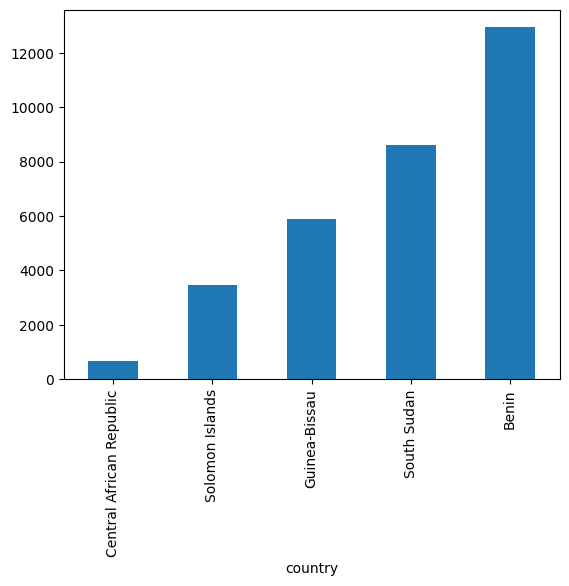

In [33]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar')

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

In [36]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 897.3 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [38]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

date    country  confirmed  deaths  recovered  active  \
0 2020-01-23  Australia        0.0     0.0        0.0     0.0   
1 2020-01-25  Australia        4.0     0.0        0.0     4.0   
2 2020-01-26  Australia        4.0     0.0        0.0     4.0   
3 2020-01-27  Australia        5.0     0.0        0.0     5.0   
4 2020-01-28  Australia        5.0     0.0        0.0     5.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              4.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              1.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  population  daily_confirmed_per_hundred  
0         NaN           NaN    25726900                          NaN  
1         0.0           0.0    25726900                     0.000016  
2         0.0           0.0    25726900                     0.000000  
3         0.0           0.0    25726900                     0.000004  
4         0.0           0.0    25726900                     0.000000

Text(0.5, 1.0, 'Тепловая карта заболеваемости')

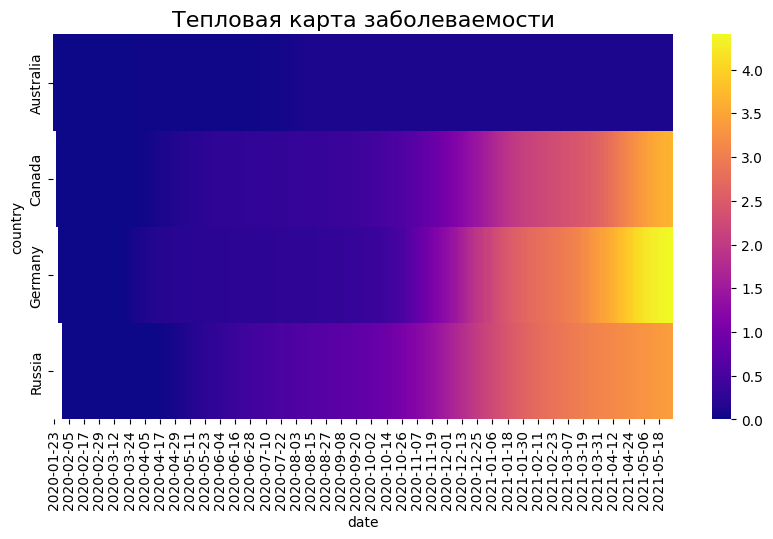

In [40]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population'] * 100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16)

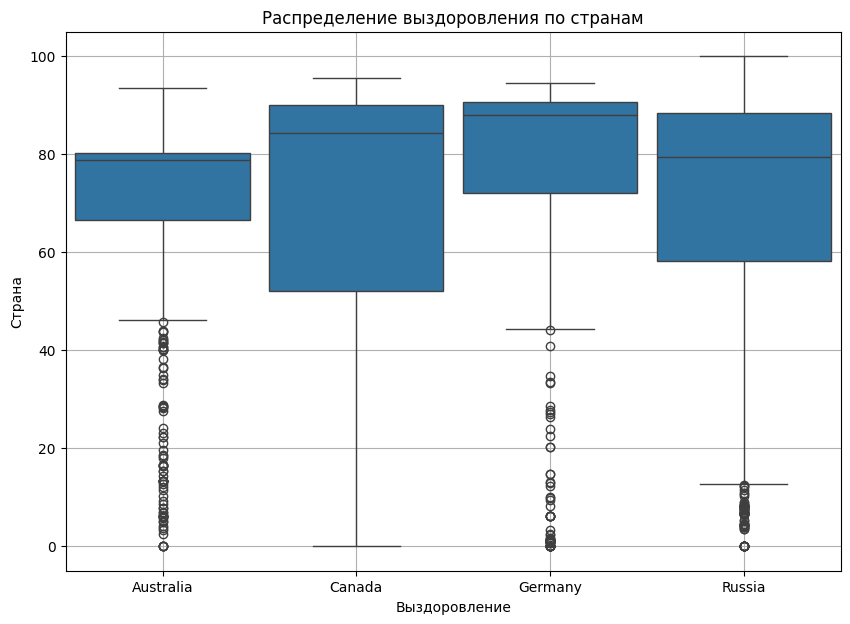

In [42]:
fig=plt.figure(figsize=(10,7))
boxplot=sns.boxplot(data=croped_covid_df, x="country", y="recover_rate", orient="v", width=0.9)
boxplot.set_title("Распределение выздоровления по странам")
boxplot.set_xlabel("Выздоровление")
boxplot.set_ylabel("Страна")
boxplot.grid()


In [44]:
pip install plotly


  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 24.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install --upgrade nbformat

  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/f4/e7/ef30a90b70eba39e675689b9eaaa92530a71d7435ab8f9cae520814e0caf/nbformat-5.9.2-py3-none-any.whl.metadata
  Obtaining dependency information for fastjsonschema from https://files.pythonhosted.org/packages/9c/b9/79691036d4a8f9857e74d1728b23f34f583b81350a27492edda58d5604e1/fastjsonschema-2.19.1-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema>=2.6 from https://files.pythonhosted.org/packages/39/9d/b035d024c62c85f2e2d4806a59ca7b8520307f34e0932fbc8cc75fe7b2d9/jsonschema-4.21.1-py3-none-any.whl.metadata
  Obtaining dependency information for attrs>=22.2.0 from https://files.pythonhosted.org/packages/e0/44/827b2a91a5816512fcaf3cc4ebc465ccd5d598c45cefa6703fcf4a79018f/attrs-23.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema-specifications>=2023.03.6 from https://files.pythonhosted.org/packages/ee/07/44bd408781594c4d0a027666ef27fab1e441b109dc3

In [46]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.18.0


In [47]:
line_data = covid_df.groupby('date', as_index=False)['daily_vaccinations'].sum()
fig = px.line(data_frame=line_data, x = 'date', y='daily_vaccinations')
fig.show()

In [50]:
choroleth_data=covid_df.sort_values(by="date")
choroleth_data["date"]=choroleth_data["date"].astype("string")
fig=px.choropleth(data_frame=choroleth_data, locations="country", locationmode="country names", 
    color="total_vaccinations",  
    hover_name="country", #группирующая переменная
    animation_frame="date",
    color_continuous_scale='Reds', #палитра цветов
    range_color=[0, 600e6])
fig.show()